# Cue the Music
Caden Kim  
CPSC 222, Fall 2020

## Introduction
For this project, I'm looking at the music domain. The data that I'm using for this is my Spotify data that comes in JSON format. My hypothesis for this dataset is that I, on average, listened to more music in quarantine than I did before quarantine. To do this, I used two different datasets. One is from the end of September 2019 to the beginning of November 2019 and the other is from the end of March to the beginning of May this year. I tested this by comparing the average amounts of songs per genre that I listened to. I categorized each song into a genre and compared that genre in quarantine and before quarantine. What I found was that my most popular genres were country and pop. 

## Data Analysis
My dataset is my Spotify data that comes in JSON format. In there, it gives me the date and time played, the artist name, the song name and the milliseconds played. To prepare the data, I turned the JSON file into a dataframe and used the datetime library to give me the day of the week that the song was played. I then dropped all of the songs/rows that had a msPlayed less than 30000 ms which is 30 seconds. After that, I used the Spotify script to find the genre of each artist and took the first genre that it gave me for each artist since the script gives you multiple for each one. I also got rid of any unwanted characters from the genre strings that it gave me. I grouped the genres by the days of the week to see what my most popular genres were per day. I turned those into histograms to give me a visual on what the data is like. I also just split up the data by genre and had each genre be counted. I then compared the counted genre data from before quarantine to the counted data from during quarantine. I decided to compare pop music on Sundays to Fridays because Sundays are days that I do a lot of homework so I listen to a lot of music. And Fridays because those are days that I'm usually going out or hanging out and listening to music. 

In [1]:
import pandas as pd
import numpy as np
import datetime
import calendar
import statistics
import scipy.stats as stats
import requests
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

music_df = pd.read_json("StreamingHistory0.json")

dow = []
ser = music_df["endTime"]

#https://docs.python.org/3/library/datetime.html
def getDay(date): 
    day = datetime.datetime.strptime(date, '%Y-%m-%d %H:%M').weekday() 
    return (calendar.day_name[day]) 

for i in range(0, len(ser), 1):
    dow.append(getDay(ser[i]))
    
music_df.insert(3, "Day of the Week", dow)

music_df = music_df.set_index("endTime")
music_df["msPlayed"] = music_df["msPlayed"].astype(np.int)

ser1 = music_df["msPlayed"]

music_df.drop(music_df[music_df["msPlayed"] <= 30000].index, inplace=True)
music_df.to_csv("help_cleaned.csv")

### Spotify Script

In [2]:
token = "BQCpIcck61nAmbfXgSqsHXrzClKwmNImYNKyqNZrXVGiCfd8FRnvbwK9YG4F8GkGSMd7oLhlJATUuWoNs23zEP--xM3i46YCW3HOy34yxSkJar7j4OnBAnDywzDvMUlJcRQi8TuNwFTAV90BkCi-wnMz "
API_endpoint = "https://api.spotify.com/v1/search"


def make_request(fullURL):
    headers = {"Accept": "application/json", "Content-Type": "application/json", "Authorization": "Bearer " + token}

    response = requests.get(url=fullURL, headers=headers)
    json_object = json.loads(response.text)

    return json_object

def search_request(search_term, search_type):
    search_term = requests.utils.quote(search_term)
    search_type = requests.utils.quote(search_type)
    url = API_endpoint + "?q=" + search_term
    url += "&type=" + search_type
    print(url)
    json_obj = make_request(url)
    return json_obj

def get_genres(json_obj):
    artists = json_obj["artists"]
    items = artists["items"]
    first_artist_item = items[0] # TODO: are they sorted by match confidence/popularity?
    genres = first_artist_item["genres"]
    return genres

def main(ser, x):
    json_obj = search_request(ser[i], "artist")
    genres = get_genres(json_obj)
    x.append(genres)

In [3]:
ser2 = music_df["artistName"]
genre = []
for i in range(0, len(ser2), 1):
    main(ser2, genre)
music_df.insert(3, "Genres", genre)

https://api.spotify.com/v1/search?q=blink-182&type=artist
https://api.spotify.com/v1/search?q=Veronica%20Vega&type=artist
https://api.spotify.com/v1/search?q=Old%20Dominion&type=artist
https://api.spotify.com/v1/search?q=Chris%20Young&type=artist
https://api.spotify.com/v1/search?q=Old%20Dominion&type=artist
https://api.spotify.com/v1/search?q=Jonas%20Brothers&type=artist
https://api.spotify.com/v1/search?q=Dan%20%2B%20Shay&type=artist
https://api.spotify.com/v1/search?q=Jay%20Park&type=artist
https://api.spotify.com/v1/search?q=Gente%20De%20Zona&type=artist
https://api.spotify.com/v1/search?q=Panic%21%20At%20The%20Disco&type=artist
https://api.spotify.com/v1/search?q=Little%20Big%20Town&type=artist
https://api.spotify.com/v1/search?q=Sam%20Hunt&type=artist
https://api.spotify.com/v1/search?q=The%20Beatles&type=artist
https://api.spotify.com/v1/search?q=Florida%20Georgia%20Line&type=artist
https://api.spotify.com/v1/search?q=Greek%20Fire&type=artist
https://api.spotify.com/v1/search?q=

In [4]:
music_df.to_csv("help_cleaned.csv")
music_df = pd.read_csv("help.csv")
music_df["Genre"] = music_df["Genre"].astype(np.str)
serg = list(music_df["Genre"])
genre1 = []
remove_chars = ['[', ']', "'"]

for i in range(0, len(serg), 1):
    serg[i] = serg[i].split("', '")

for item in serg:
    genre1.append(item[0])
    
#https://www.geeksforgeeks.org/python-removing-unwanted-characters-from-string/
for i in range(0, len(genre1), 1):
    for j in remove_chars:
        genre1[i] = genre1[i].replace(j, '')

del music_df["Genre"]
music_df.insert(3, "Genre", genre1)
music_df.to_csv("help_cleaned.csv")

### Data Visualization

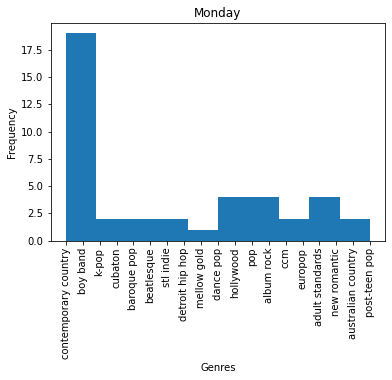

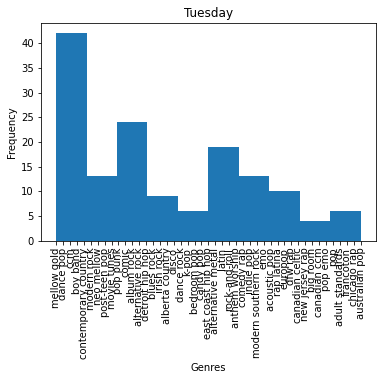

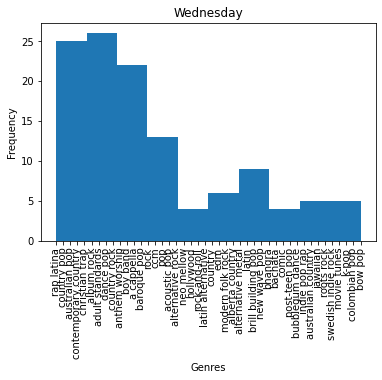

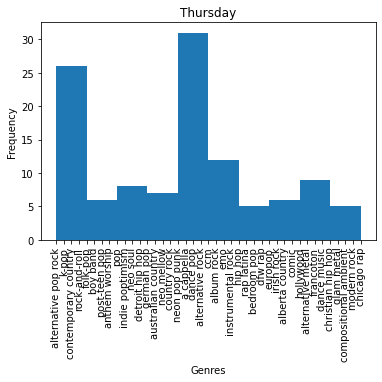

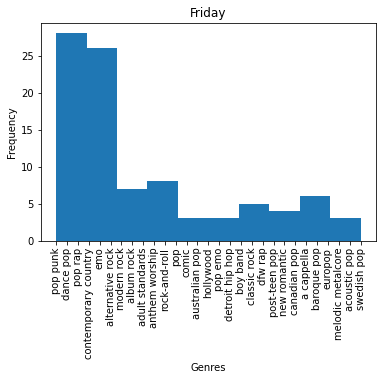

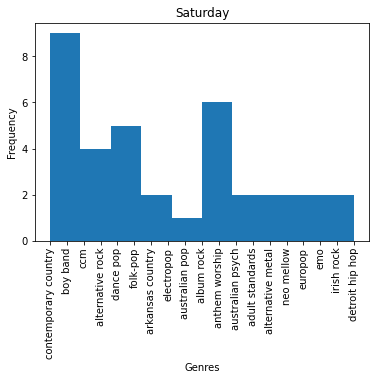

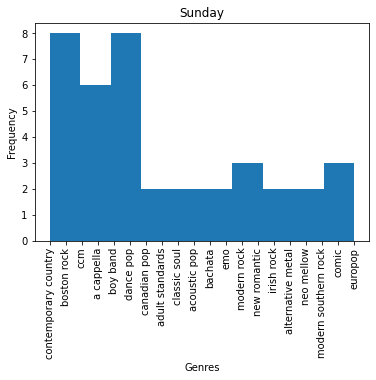

In [5]:
music_df = pd.read_csv("help_cleaned.csv")
grouped_by_day = music_df.groupby("Day of the Week")
monday = grouped_by_day.get_group("Monday")
x = monday["Genre"]

def histogram(x, y):
    plt.figure()
    plt.hist(x)
    plt.title(y)
    plt.xlabel("Genres")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.show()
histogram(x, "Monday")

tuesday = grouped_by_day.get_group("Tuesday")
y = tuesday["Genre"]
histogram(y, "Tuesday")

wednesday = grouped_by_day.get_group("Wednesday")
z = wednesday["Genre"]
histogram(z, "Wednesday")

thursday = grouped_by_day.get_group("Thursday")
a = thursday["Genre"]
histogram(a, "Thursday")

friday = grouped_by_day.get_group("Friday")
b = friday["Genre"]
histogram(b, "Friday")

saturday = grouped_by_day.get_group("Saturday")
c = saturday["Genre"]
histogram(c, "Saturday")

sunday = grouped_by_day.get_group("Sunday")
d = sunday["Genre"]
histogram(d, "Sunday")

### kNN Classification

In [6]:
sunday = sunday.groupby("Genre").agg('count')
monday = monday.groupby("Genre").agg('count')
tuesday = tuesday.groupby("Genre").agg('count')

sunday = sunday["endTime"]
monday = monday["endTime"]
tuesday = tuesday["endTime"]
days_df = pd.concat([sunday, monday, tuesday], axis=1)

In [14]:
knn_df = pd.read_csv("knn_cleaned.csv")

le = preprocessing.LabelEncoder()
le.fit(knn_df["Genres"])
knn_df["Genres"] = le.transform(knn_df["Genres"])

x_train = knn_df.drop("Tuesday", axis=1)
y_train = knn_df["Tuesday"]

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_normalized = scaler.transform(x_train)
print(x_train_normalized)
x_test = [0, 1, 12]
x_test_normalized = scaler.transform([x_test])
print(x_test_normalized)

knn_clf = KNeighborsClassifier(n_neighbors=3, metric="euclidean")

knn_clf.fit(x_train_normalized, y_train)
y_predicted = knn_clf.predict(x_test_normalized)
print("prediction:", y_predicted)
print("distances:", knn_clf.kneighbors(x_test_normalized))
accuracy = knn_clf.score(x_train, y_train)
print("Accuracy: ", accuracy)

[[0.         0.         0.15384615]
 [0.2        0.         0.30769231]
 [0.4        0.5        0.        ]
 [0.6        1.         1.        ]
 [0.8        1.         0.15384615]
 [1.         0.16666667 0.        ]]
[[0.         0.         0.84615385]]
prediction: [1]
distances: (array([[0.57440476, 0.69230769, 1.06112032]]), array([[1, 0, 2]], dtype=int64))
Accuracy:  0.5


### Linear Regression

In [10]:
mean_sunday = np.mean(knn_df["Sunday"])
mean_monday = np.mean(knn_df["Monday"])

x = knn_df["Sunday"]
y = knn_df["Monday"]

num_prods = []
den_squares = []

for i in range(len(knn_df)):
    num_prods.append((x[i] - mean_sunday) * (y[i] - mean_monday))
    den_squares.append((x[i] - mean_sunday) ** 2)
m = sum(num_prods) / sum(den_squares)
b = mean_monday - m * mean_sunday
print("m:", m, "b:", b)

m: 0.8644067796610169 b: 1.3305084745762716


In [11]:
m, b, r, p_value, std_err = stats.linregress(x, y)
print("r:", r)

test_instance = 6
y_predicted = m * test_instance + b
print("y predicted:", y_predicted, "residual (error):", 2 * test_instance - y_predicted)

r: 0.495923385468983
y predicted: 6.516949152542374 residual (error): 5.483050847457626


### Decision Tree

1.0


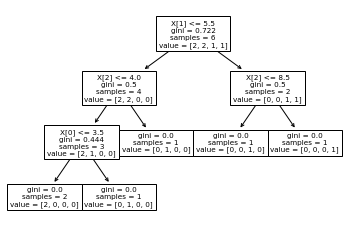

In [13]:
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf = clf.fit(x_train, y_train)
tree.plot_tree(clf, feature_names=x_train.columns, filled=True)
tree.plot_tree(clf, max_depth=3)
accuracy = clf.score(x_train, y_train)
print("Accuracy", accuracy)

## Classification Results
For my kNN classification, I decided to use Sunday's data and Monday's data to predict how many times I would listen to a specific genre on Tuesday. What I did was I had the counts for each genre for each of those days and only kept the genres that had data for each of one of those days. I then used the label encoder to turn the genres into numbers and noramlized the data. I tested the classifier by inputting different amounts for Sunday and Monday and for each genre. The accuracy of the kNN classifier is a little off as the predictions are higher than what I was expecting. I compared this to the linear regression model and the tree classifier. The linear regression was also a little off but better than the kNN. And the decision tree was the most accurate out of the three. 

### Dataset #2

In [ ]:
music_df1 = pd.read_json("StreamingHistory5.json")

dow = []
ser11 = music_df1["endTime"]

for i in range(0, len(ser11), 1):
    dow.append(getDay(ser11[i]))
    
music_df1.insert(3, "Day of the Week", dow)

music_df1 = music_df1.set_index("endTime")
music_df1["msPlayed"] = music_df1["msPlayed"].astype(np.int)

ser0 = music_df1["msPlayed"]

music_df1.drop(music_df1[music_df1["msPlayed"] <= 30000].index, inplace=True)
music_df1.to_csv("help1_cleaned.csv")

ser21 = music_df1["artistName"]
genre1 = []
for i in range(0, len(ser21), 1):
    main(ser21, genre1)
music_df1.insert(3, "Genres", genre1)

In [ ]:
music_df1.to_csv("help1_cleaned.csv")
music_df1 = pd.read_csv("help1.csv")
music_df1["Genres"] = music_df1["Genres"].astype(np.str)
serg1 = list(music_df1["Genres"])
genre11 = []

for i in range(0, len(serg1), 1):
    serg1[i] = serg1[i].split("', '")

for item in serg1:
    genre11.append(item[0])
    
for i in range(0, len(genre11), 1):
    for j in remove_chars:
        genre11[i] = genre11[i].replace(j, '')

#del music_df1["Genre"]
music_df1.insert(3, "Genre", genre11)
music_df1.to_csv("help1_cleaned.csv")

### Data Visualization

In [ ]:
music_df1 = pd.read_csv("help1_cleaned.csv")
grouped_by_day = music_df1.groupby("Day of the Week")

monday1 = grouped_by_day.get_group("Monday")
x1 = monday1["Genre"]
histogram(x1, "Monday")

tuesday1 = grouped_by_day.get_group("Tuesday")
y1 = tuesday1["Genre"]
histogram(y1, "Tuesday")

wednesday1 = grouped_by_day.get_group("Wednesday")
z1 = wednesday1["Genre"]
histogram(z1, "Wednesday")

thursday1 = grouped_by_day.get_group("Thursday")
a1 = thursday1["Genre"]
histogram(a1, "Thursday")

friday1 = grouped_by_day.get_group("Friday")
b1 = friday1["Genre"]
histogram(b1, "Friday")

saturday1 = grouped_by_day.get_group("Saturday")
c1 = saturday1["Genre"]
histogram(c1, "Saturday")

sunday1 = grouped_by_day.get_group("Sunday")
d1 = sunday1["Genre"]
histogram(d1, "Sunday")

### T-tests

One tailed, two sample inedependent/dependent t-test  
On average, did I listen to country music more in quarantine than I did before quarantine?  
$\alpha = 0.05$  
$H0: \mu_{quarantine} \leqslant \mu_{normal}$  
$H1: \mu_{quarantine} \gt \mu_{normal}$  
$df = 11 + 7 = 18 - 2 = 16$  
$t = 2.12$  
$t_c = 0.301$  
$t > t_c$  
Since t is greater than t_computed, we fail to reject the NULL hypothesis. At the significance level of 0.05 and since the p-value is greater, we fail to reject H0 as we do not have sufficient evidence to conclude H1.

In [ ]:
music_df = pd.read_csv("help_cleaned.csv")
music_df1 = pd.read_csv("help1_cleaned.csv")

#https://towardsdatascience.com/pie-charts-in-python-302de204966c
country_quarantine = music_df1.groupby("Genre").agg('count')
#alberta country 3, alternative country 1, arkansas country 4, australian country 11, 
#canadian contemporary country 12, classic country pop 1, contemporary country 243, country 10, country pop 1
#country rap 1, country rock 1

country_normal = music_df.groupby("Genre").agg('count')
#alberta country 3, arkansas country 1, australian country 3, contemporary country 108, country 1, 
#country pop 1, country rock 3

cquar = [3, 1, 4, 11, 12, 1, 243, 10, 1, 1, 1]
cnorm = [3, 1, 3, 108, 1, 1, 3]

ser_Q = cquar
ser_N = cnorm

Xbar_Q = np.mean(ser_Q)
Xbar_N = np.mean(ser_N)

n_Q = len(ser_Q)
n_N = len(ser_N)

s_Q = np.std(ser_Q, ddof=1)
s_N = np.std(ser_N, ddof=1)

pooled_var = ((n_Q - 1) * s_Q ** 2 + (n_N - 1) * s_N ** 2) \
/ (n_Q + n_N - 2)

t_computed = (Xbar_Q - Xbar_N) / np.sqrt(pooled_var * (1 / n_Q + 1 / n_N))

t_computed, p_val = stats.ttest_ind(ser_Q, ser_N)
print(t_computed, p_val / 2)

One tailed, two sample inedependent/dependent t-test  
On average, did I listen to pop music more in quarantine than I did before quarantine?  
$\alpha = 0.05$  
$H0: \mu_{quarantine} \leqslant \mu_{normal}$  
$H1: \mu_{quarantine} \gt \mu_{normal}$  
$df = 28 + 27 = 55 - 2 = 53 = 60$  
$t = 2.00$  
$t_c = -0.116$  
$t > t_c$  
Since t is greater than t_computed, we fail to reject the NULL hypothesis. At the significance level of 0.05 and since the p-value is greater, we fail to reject H0 as we do not have sufficient evidence to conclude H1.

In [ ]:
music_df = pd.read_csv("help_cleaned.csv")
music_df1 = pd.read_csv("help1_cleaned.csv")

pop_quarantine = music_df1.groupby("Genre").agg('count')
#acoustic pop 12, alternative pop rock 1, australian pop 3, baroque pop 5, bedroom pop 2, brill building pop 4
#canadian pop 2, canadian pop punk 1, candy pop 1, channel pop 1, classic country pop 1, classic uk pop 1
#colombian pop 2, country pop 1, dance pop 75, electropop 1, europop 6, folk pop 3, indie pop 7, indie pop rap 1
#k-pop 10, neon pop punk 8, pop 17, pop emo 3, pop punk 1, pop rap 1, pop soul 1, post-teen pop 1

pop_normal = music_df.groupby("Genre").agg('count')
#acoustic pop 5, alternative pop rock 1, australian pop 6, baroque pop 6, bedroom pop 3, bow pop 1,
#brill building pop 1, candy pop 2, channel pop 1, colombian pop 1, country pop 1, dance pop 90, 
#electropop 1, europop 12, folk pop 3, german pop 1, indie pop 1, indie pop rap 1, swedish pop 1
#k-pop 4, neon pop punk 4, new wave pop 1, pop 13, pop emo 2, pop punk 9, pop rap 1, post-teen pop 7

pquar = [12, 1, 3, 5, 2, 4, 2, 1, 1, 1, 1, 1, 2, 1, 75, 1, 6, 3, 7, 1, 10, 8, 17, 3, 1, 1, 1, 1]
pnorm = [5, 1, 6, 6, 3, 1, 1, 2, 1, 1, 1, 90, 1, 12, 3, 1, 1, 1, 1, 4, 4, 1, 13, 2, 9, 1, 7]

ser_Q = pquar
ser_N = pnorm

Xbar_Q = np.mean(ser_Q)
Xbar_N = np.mean(ser_N)

n_Q = len(ser_Q)
n_N = len(ser_N)

s_Q = np.std(ser_Q, ddof=1)
s_N = np.std(ser_N, ddof=1)

pooled_var = ((n_Q - 1) * s_Q ** 2 + (n_N - 1) * s_N ** 2) \
/ (n_Q + n_N - 2)

t_computed = (Xbar_Q - Xbar_N) / np.sqrt(pooled_var * (1 / n_Q + 1 / n_N))

t_computed, p_val = stats.ttest_ind(ser_Q, ser_N)
print(t_computed, p_val / 2)

One tailed, two sample inedependent/dependent t-test  
On average, do I listen to more pop music on Sundays than I do on Fridays?  
$\alpha = 0.05$  
$H0: \mu_{sunday} \leqslant \mu_{friday}$  
$H1: \mu_{sunday} \gt \mu_{friday}$  
$df = 49 + 48 = 87 - 2 = 85 = 120$  
$t = 1.98$  
$t_c = -0.752$  
$t > t_c$  
Since t is greater than t_computed, we fail to reject the NULL hypothesis. At the significance level of 0.05 and since the p-value is greater, we fail to reject H0 as we do not have sufficient evidence to conclude H1.

In [ ]:
dataframes = [music_df, music_df1]
pop_df = pd.concat(dataframes)

grouped_by_day = pop_df.groupby("Day of the Week")
sun_pop = grouped_by_day.get_group("Sunday")
fri_pop = grouped_by_day.get_group("Friday")

sunday = sun_pop.groupby("Genre").agg('count')
friday = fri_pop.groupby("Genre").agg('count')

ser_S = sunday["endTime"]
ser_F = friday["endTime"]

Xbar_S = np.mean(ser_S)
Xbar_F = np.mean(ser_F)

n_S = len(ser_S)
n_F = len(ser_F)

s_S = np.std(ser_S, ddof=1)
s_F = np.std(ser_F, ddof=1)

pooled_var = ((n_S - 1) * s_S ** 2 + (n_F - 1) * s_F ** 2) \
/ (n_S + n_F - 2)

t_computed = (Xbar_S - Xbar_F) / np.sqrt(pooled_var * (1 / n_S + 1 / n_F))

t_computed, p_val = stats.ttest_ind(ser_S, ser_F)
print(t_computed, p_val / 2)

### Conclusion
In conclusion, I did listen to more music while in quarantine than I did before. The dataset that I used was my Spotify data from last year and right after quarantine started. The challenge that I had for classifying this was the fact that there weren't really any numbers for me to use, it was mostly categorical. So turning categorical data into something that I could use was difficult. The classification approach that I developed was the kNN, linear regression, and decision tree. All three were a little inaccurate but the decision tree was the most accurate out of the three. Being able to use more data and being able to set it up in a way that utilizes its strengths could help improve its performance. Impacts from research could be that we would be able to see patterns in what music people listen to on a certain day or in a certain situation. Stakeholders like music companies could be interested in this because they could use this data to decide when the best time to release a certain song or album would be. However, the ethical concerns of this is that they could use this data to target certain individuals based on their taste in music. For example, if they are listening to sad music for a certain length of time, companies could target them with certain ads or products. Predatory ads could be more prevalent depending on the data. 